In [ ]:
# 修改标题及x，y坐标轴字体及大小
plt.title("$MFCC_0$参数中值滤波", fontsize=15,fontweight='bold')
plt.xlabel("时间/s", fontsize=15,fontweight='bold')
plt.ylabel("数值", fontsize=15,fontweight='bold')

# 修改坐标轴字体及大小
plt.yticks(fontproperties='Times New Roman', size=15,weight='bold')#设置大小及加粗
plt.xticks(fontproperties='Times New Roman', size=15)


# 设置标题
plt.rcParams['font.sans-serif'] = ['KaiTi']  # 用来正常显示中文标签，如果想要用新罗马字体，改成 Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.tight_layout()  # 解决绘图时上下标题重叠现象

#画线
plt.vlines(starts2time, min(Mfcc1)-10, max(Mfcc1)+10, colors="black", linestyles="solid",lw=2)
plt.vlines(ends2time, min(Mfcc1)-10, max(Mfcc1)+10, colors="black", linestyles="dashed",lw=2.5)

#添加图例
plt.legend(['train acc','train loss'])#添加图例
plt.legend(['train acc','train loss'],fontsize=12)#并且设置大小



#取消坐标轴刻度
plt.xticks([])  # 去x坐标刻度
plt.yticks([])  # 去y坐标刻度
plt.axis('off')  # 去坐标轴


#取消savefig保存图片时的白色边框
plt.savefig(pic_name,bbox_inches='tight',pad_inches=0.0)

#取消每一个的边框
ax1 = plt.subplot(2, 3, 1)
ax1.spines['right'].set_visible(False)	#右边
ax1.spines['top'].set_visible(False)	#上边
ax1.spines['left'].set_visible(False)	#左边
ax1.spines['bottom'].set_visible(False)	#下边



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


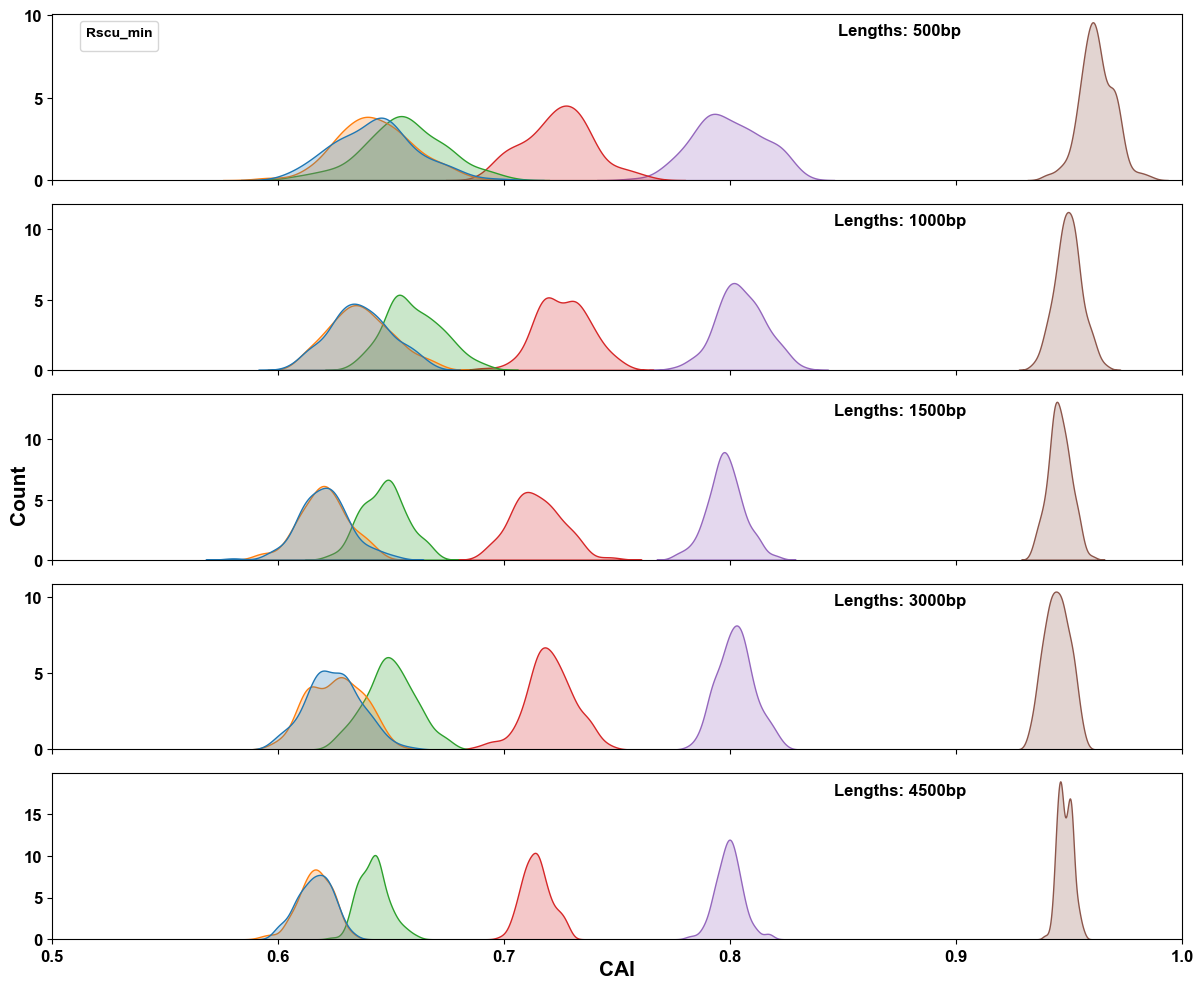

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
import os

from matplotlib import rcParams

config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False, #解决负号无法显示的问题
    "font.weight":'bold'
}
rcParams.update(config)


fig, axes = plt.subplots(5,1, figsize=(12, 10), sharex=True)

for ax in axes:
    ax.tick_params(axis='both', labelsize=12,labeltop=False)

rscu_min_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
dic = dict(zip([i for i in range(6)],rscu_min_list))

path_list = ['./CLIB_result_500bp/','./CLIB_result_1000bp/','./CLIB_result_1500bp/','./CLIB_result_3000bp/','./CLIB_result_4500bp/']
for i, path in enumerate(path_list):
    df_list = []
    for file in os.listdir(path):
        if(file.startswith('CAI_seqvars_')):
            df_list.append(pd.read_csv(os.path.join(path,file)))
    df = pd.concat(df_list).drop(columns=['Unnamed: 0'])
    sns.kdeplot(data=df, fill=True, ax=axes[i])
    axes[i].set_xlim(0.5, 1)
    # axes[i].set_ylim(0, 40)
    # plt.yticks(fontproperties='Arial', size=12,weight='bold')#设置大小及加粗
    # plt.xticks(fontproperties='Arial', size=12,weight='bold')
    axes[i].set_xlabel('CAI')
    axes[i].legend_.remove()
    axes[i].set_ylabel('')
    axes[i].text(0.75, 0.9, 'Lengths: {}'.format(path.split('_')[-1].split('/')[0]),transform=axes[i].transAxes, fontsize=12, ha='center', va='center')
legend_font = {'family': 'Arial'}
fig.legend(title='Rscu_min', labels=df.columns,facecolor='white',loc='upper right',bbox_to_anchor=(0.13, 0.98))
plt.xlabel('CAI',fontsize=15, va='center',weight='bold')
fig.text(0.001, 0.5, 'Count', va='center',fontsize=15, rotation='vertical')



# 调整子图间的距离为0
plt.subplots_adjust(hspace=0)
plt.tight_layout()
# plt.savefig('RSCU.png', dpi=600)
plt.show()

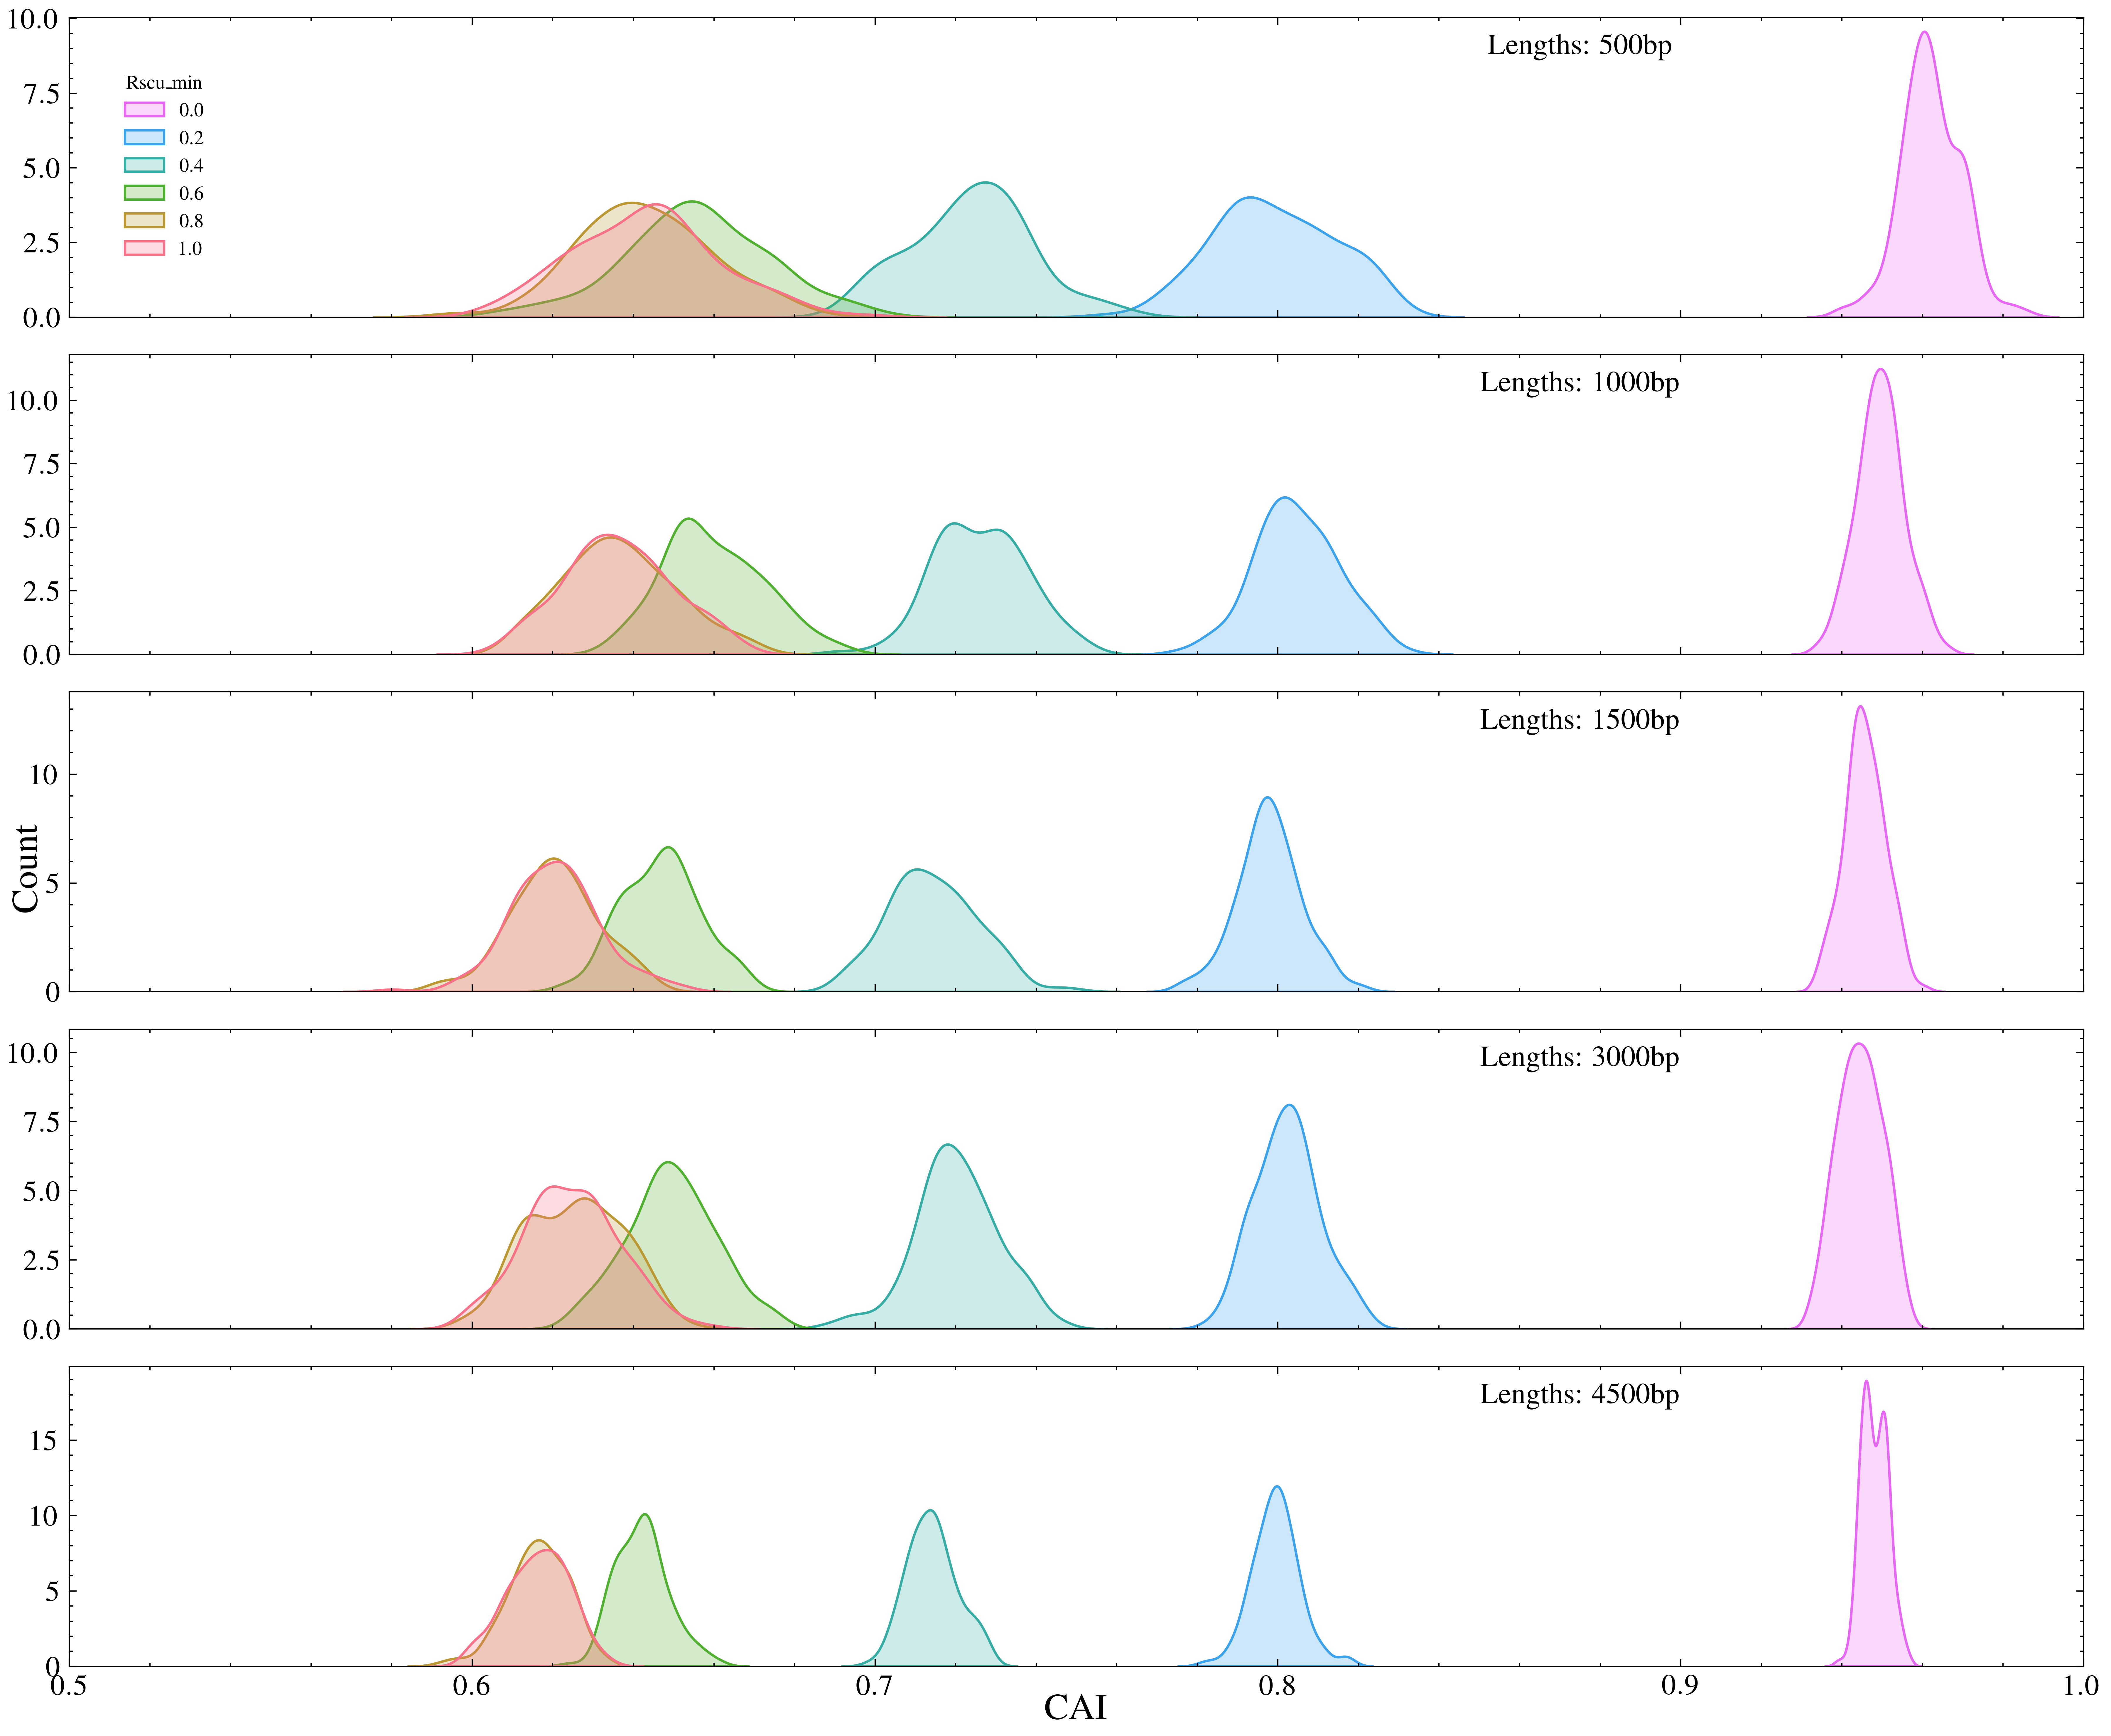

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
import os

from matplotlib import rcParams
import scienceplots
# plt.style.use('science')
%matplotlib inline
with plt.style.context(['science','ieee']):
    # config = {
    #     "font.family":'Arial',  # 设置字体类型
    #     "axes.unicode_minus": False #解决负号无法显示的问题
    # }
    # rcParams.update(config)


    fig, axes = plt.subplots(5,1, figsize=(12, 10), sharex=True)

    for ax in axes:
        ax.tick_params(axis='both', labelsize=12,labeltop=False)

    rscu_min_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    dic = dict(zip([i for i in range(6)],rscu_min_list))

    path_list = ['./CLIB_result_500bp/','./CLIB_result_1000bp/','./CLIB_result_1500bp/','./CLIB_result_3000bp/','./CLIB_result_4500bp/']
    for i, path in enumerate(path_list):
        df_list = []
        for file in os.listdir(path):
            if(file.startswith('CAI_seqvars_')):
                df_list.append(pd.read_csv(os.path.join(path,file)))
        df = pd.concat(df_list).drop(columns=['Unnamed: 0'])
        sns.kdeplot(data=df, fill=True, ax=axes[i])
        axes[i].set_xlim(0.5, 1)
        # axes[i].set_ylim(0, 40)
        axes[i].set_xlabel('CAI')
        axes[i].legend_.remove()
        axes[i].set_ylabel('')
        axes[i].text(0.75, 0.9, 'Lengths: {}'.format(path.split('_')[-1].split('/')[0]),transform=axes[i].transAxes, fontsize=12, ha='center', va='center')
    legend_font = {'family': 'Arial'}
    fig.legend(title='Rscu_min', labels=df.columns,facecolor='white',loc='upper right',bbox_to_anchor=(0.1, 0.96))
    plt.xlabel('CAI',fontsize=15, va='center')
    fig.text(0.001, 0.5, 'Count', va='center',fontsize=15, rotation='vertical')



    # 调整子图间的距离为0
    plt.subplots_adjust(hspace=0)
    plt.tight_layout()
    # plt.savefig('RSCU.png', dpi=600)
    plt.show()

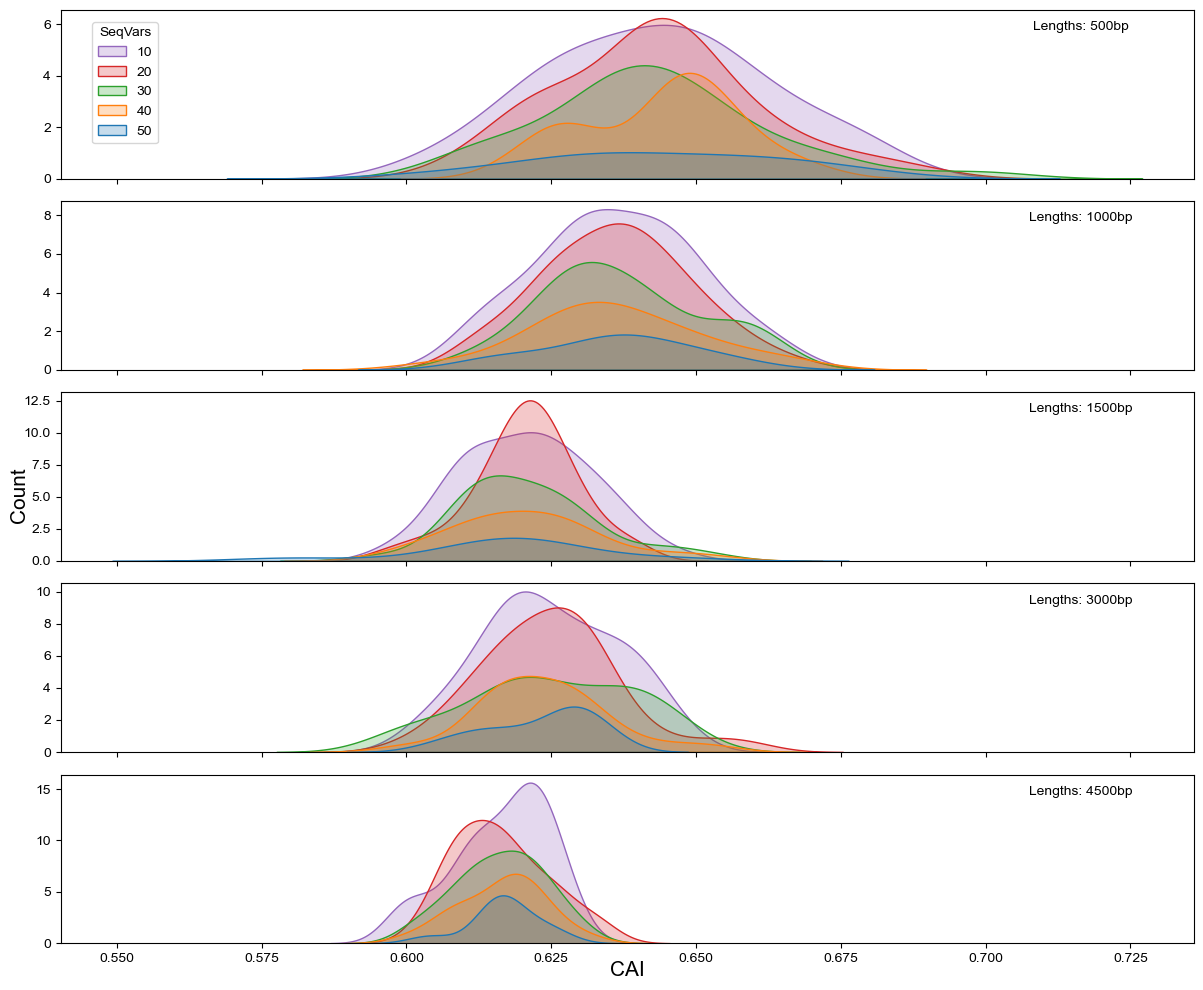

In [24]:
w = 0.008
c = "#4CAF50"
bins = [x / 100 + 0.5 for x in range(51)]
x = np.arange(0.5, 1, 0.01)  # 生成从0.6到0.9的小数，间隔为0.01
# 创建一个 3x1 的子图布局，并共享横坐标
fig, axes = plt.subplots(5,1, figsize=(12, 10), sharex=True)

plt.rc('font',family='Arial') 
rscu_min_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
dic = dict(zip([i for i in range(6)],rscu_min_list))
font_style = {'family': 'Arial', 'size': 12, 'weight': 'normal'}
path_list = ['./CLIB_result_500bp/','./CLIB_result_1000bp/','./CLIB_result_1500bp/','./CLIB_result_3000bp/','./CLIB_result_4500bp/']
for i, path in enumerate(path_list):
    df_dic = {(i+1)*10 :[] for i in range(5)}
    for file in os.listdir(path):
        if(file.startswith('CAI_seqvars_')):
            seq_vars = int(file.split('.')[0].split('_')[-1])
            df_dic[seq_vars] = pd.read_csv(os.path.join(path,file))['0.0']
    df = pd.DataFrame(df_dic)
    sns.kdeplot(data=df, fill=True, ax=axes[i])
    # axes[i].set_xlim(0.5, 1)
    # axes[i].set_ylim(0, 40)
    axes[i].set_xlabel('CAI',fontdict=font_style)
    axes[i].legend_.remove()
    axes[i].set_ylabel('')

    axes[i].text(0.9, 0.9, 'Lengths: {}'.format(path.split('_')[-1].split('/')[0]),transform=axes[i].transAxes, fontsize=10, ha='center', va='center')
    
fig.legend(title='SeqVars', labels=df.columns,facecolor='white',loc='upper right',bbox_to_anchor=(0.13, 0.98))
plt.xlabel('CAI',fontsize=15, va='center')
fig.text(0.001, 0.5, 'Count', va='center',fontsize=15, rotation='vertical')


# 调整子图间的距离为0
plt.subplots_adjust(hspace=0)
plt.tight_layout()
# plt.savefig('RSCU.png', dpi=600)
plt.show()

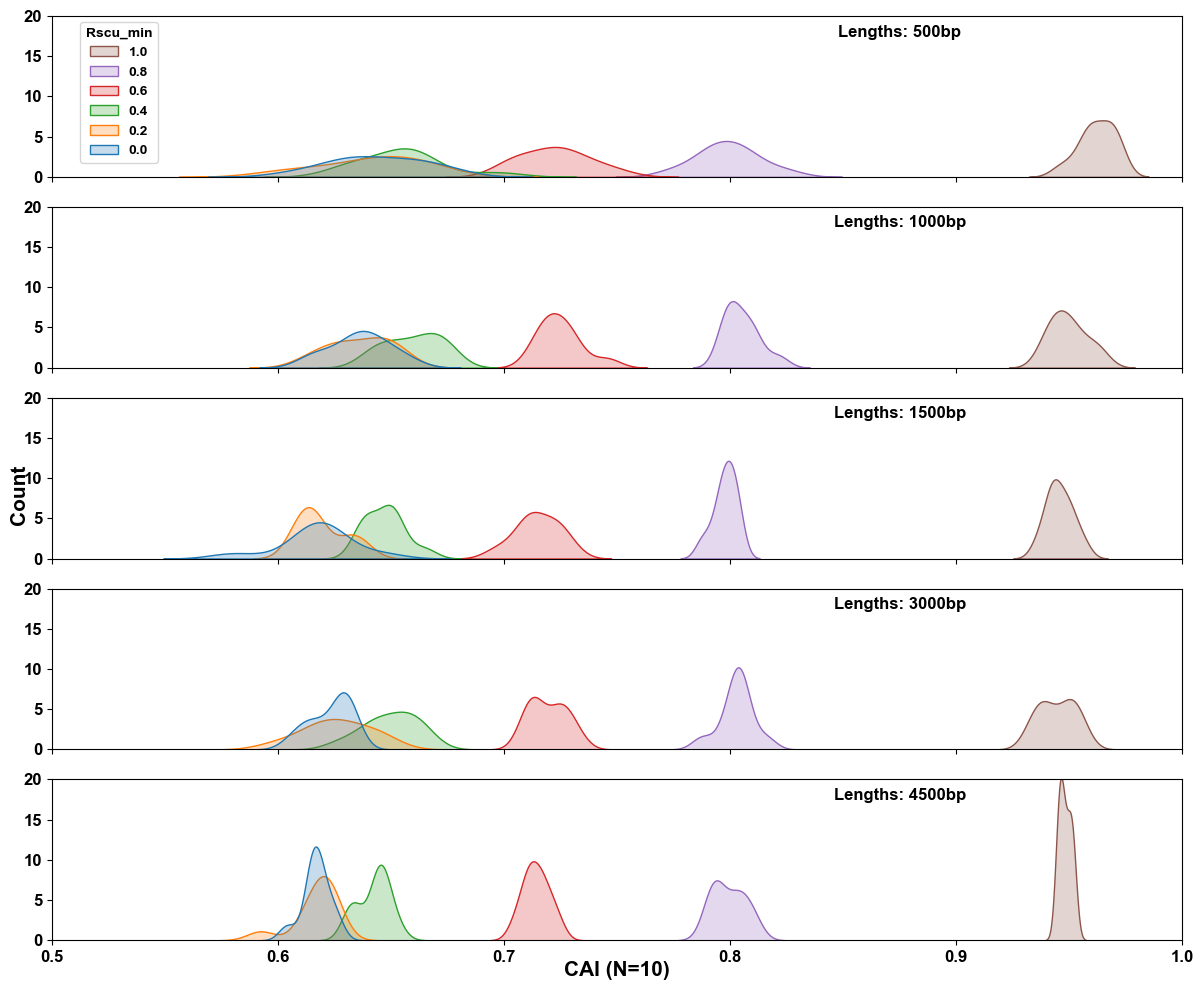

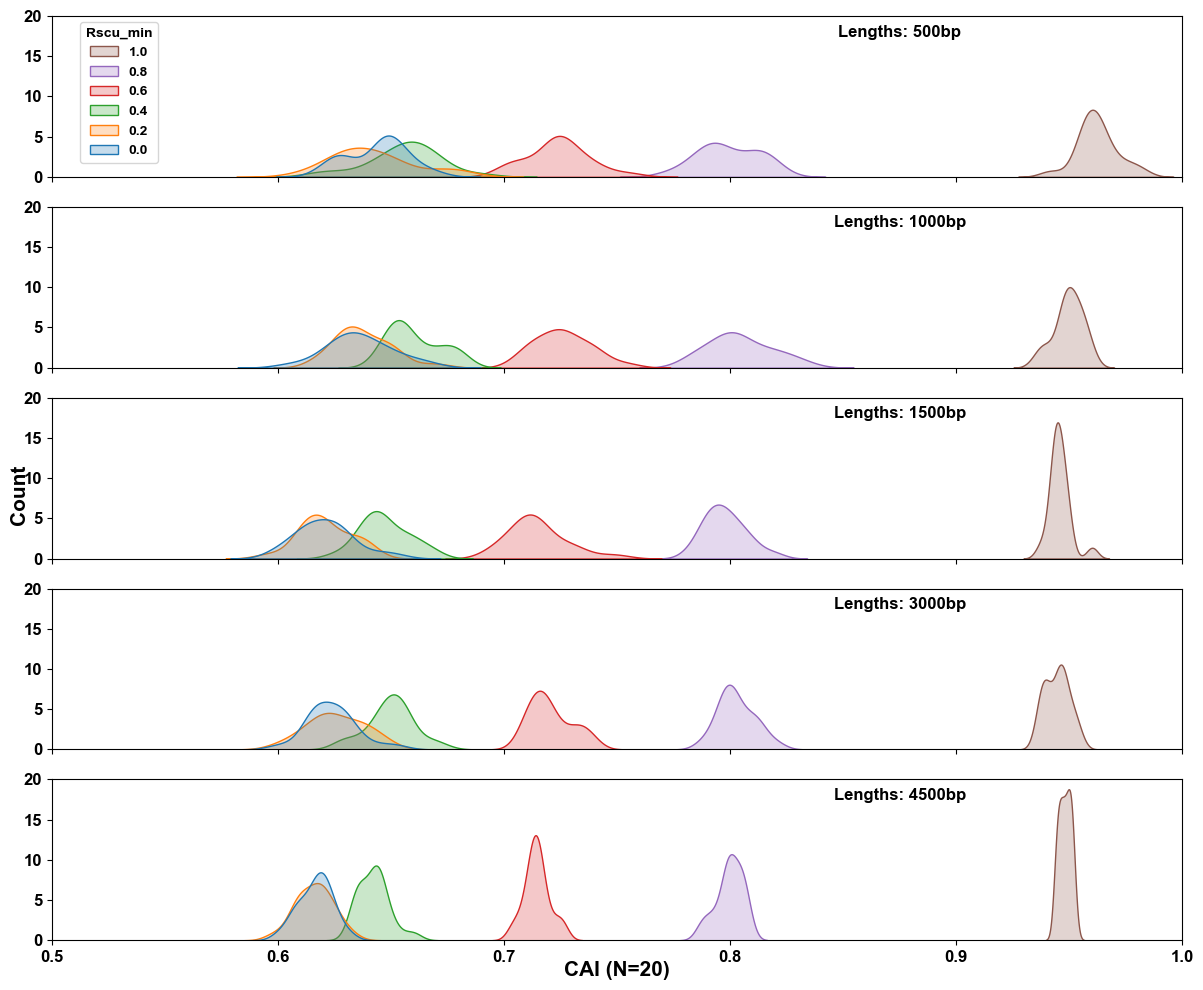

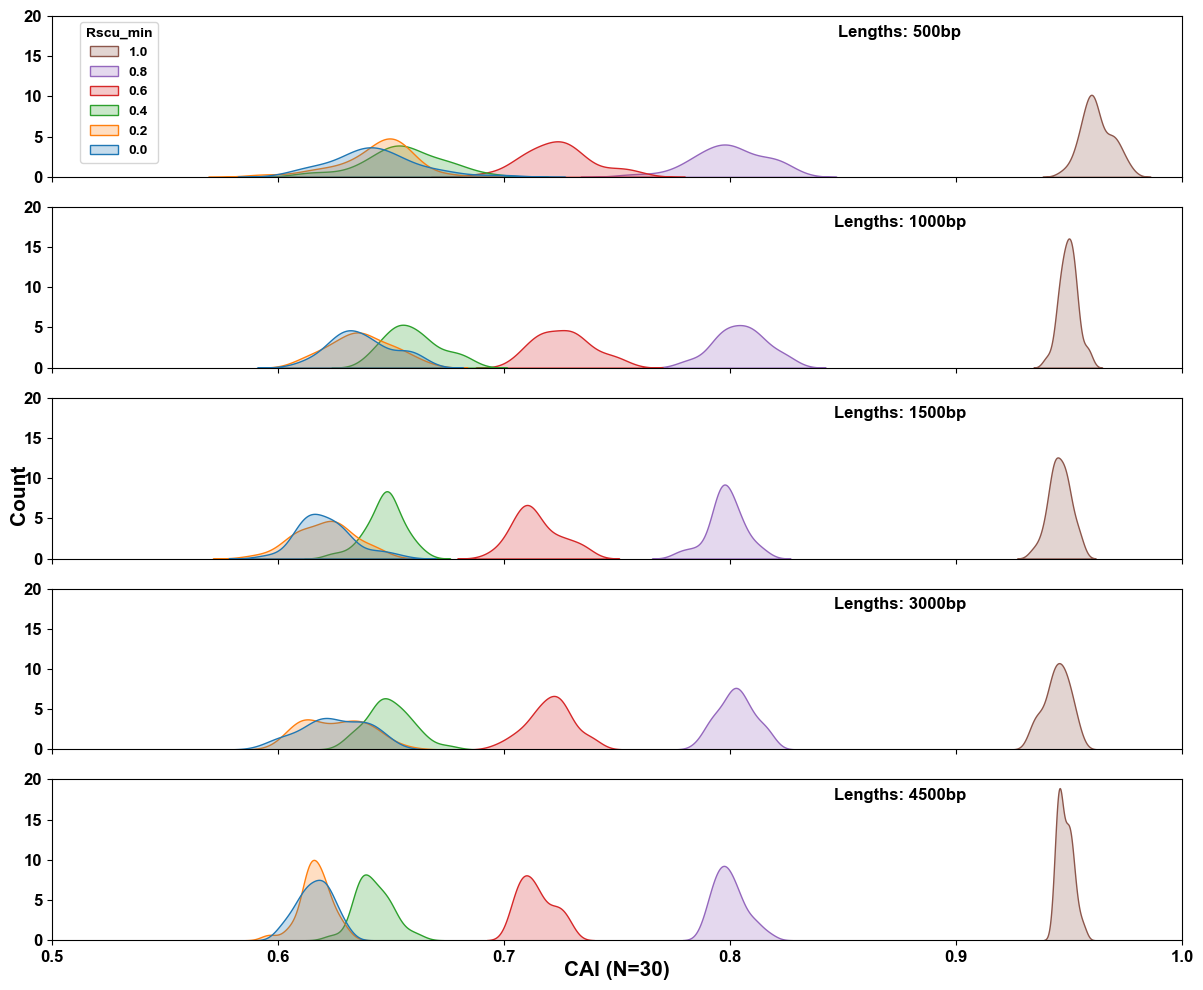

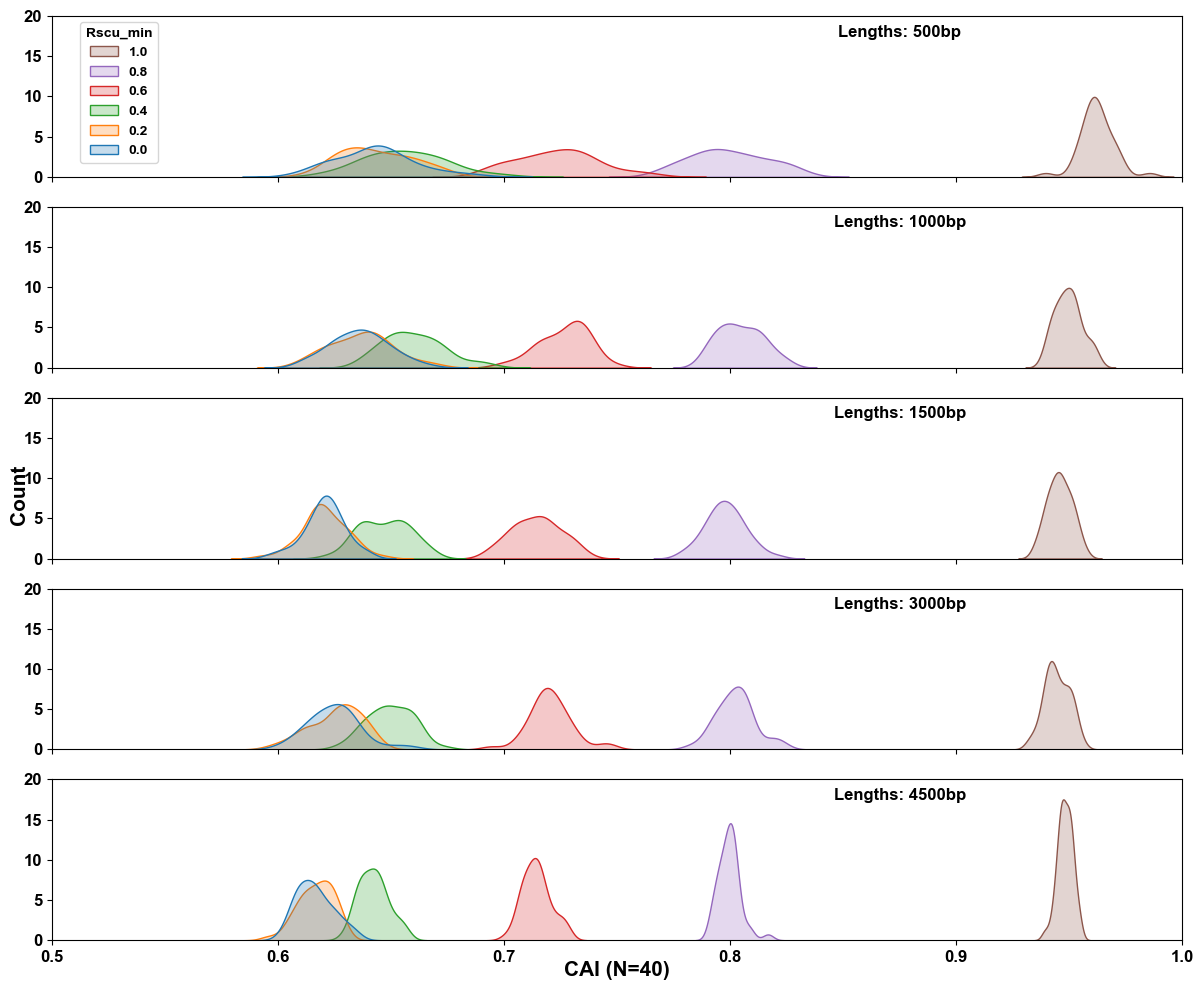

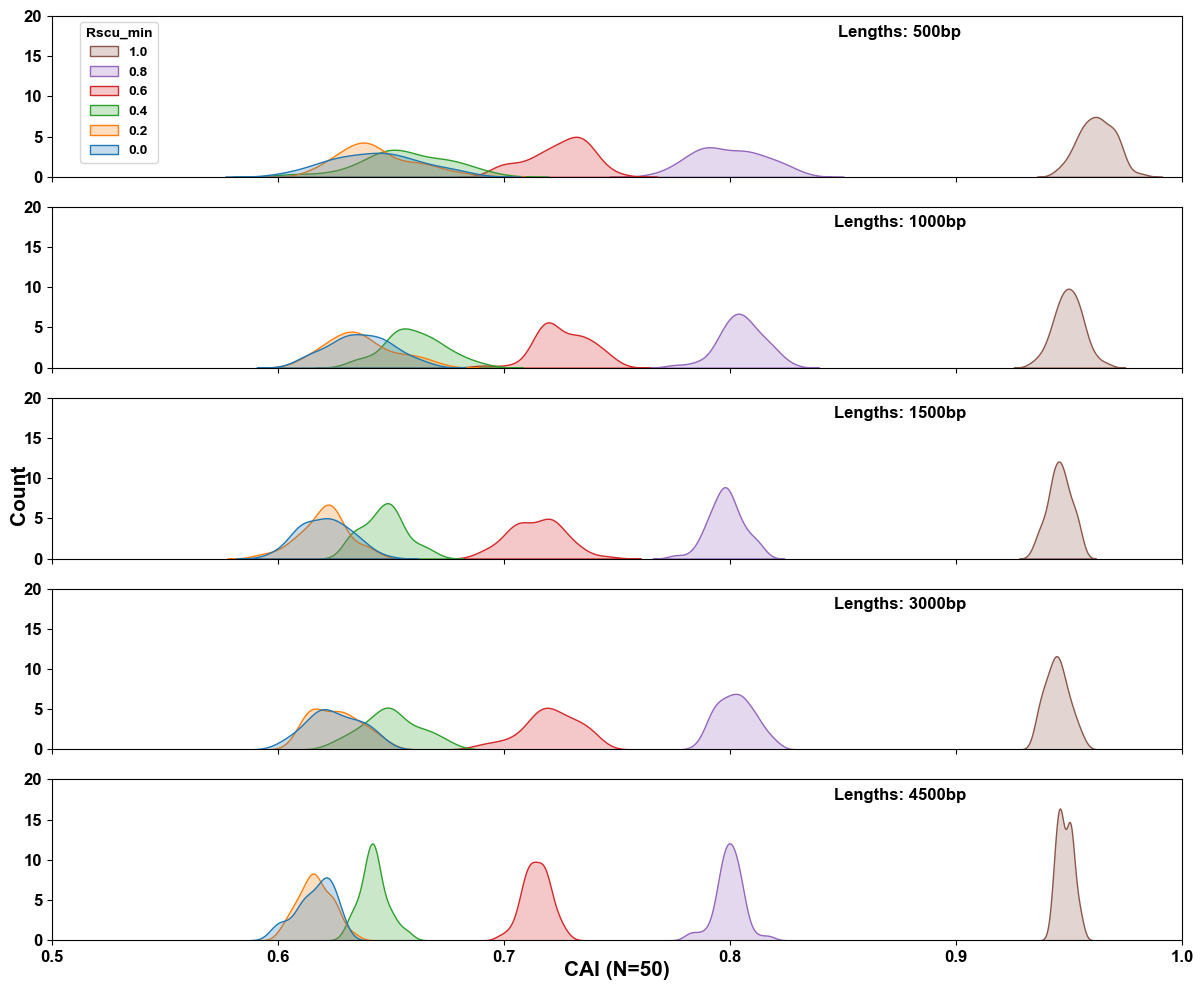

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns
import os
from matplotlib import rcParams

config = {
    "font.family":'Arial',  # 设置字体类型
    "axes.unicode_minus": False, #解决负号无法显示的问题
    "font.weight":'bold'
}
rcParams.update(config)

rscu_min_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
dic = dict(zip([i for i in range(6)],rscu_min_list))
seq_vars = [(i+1)*10 for i in range(5)]
for seq_var in seq_vars:
    fig, axes = plt.subplots(5,1, figsize=(12, 10), sharex=True)
    for ax in axes:
        ax.tick_params(axis='both', labelsize=12,labeltop=False)
    path_list = ['./CLIB_result_500bp/','./CLIB_result_1000bp/','./CLIB_result_1500bp/','./CLIB_result_3000bp/','./CLIB_result_4500bp/']
    for i, path in enumerate(path_list):
        filename = path+'CAI_seqvars_{}.csv'.format(seq_var)
        df = pd.read_csv(filename).drop(columns=['Unnamed: 0'])
        sns.kdeplot(data=df, fill=True, ax=axes[i])
        axes[i].set_xlim(0.5, 1)
        axes[i].set_ylim(0, 20)
        axes[i].set_xlabel('CAI')
        axes[i].legend_.remove()
        axes[i].set_ylabel('')
        axes[i].text(0.75, 0.9, 'Lengths: {}'.format(path.split('_')[-1].split('/')[0]),transform=axes[i].transAxes, fontsize=12, ha='center', va='center')

    fig.legend(title='Rscu_min', labels=df.columns[::-1],facecolor='white',loc='upper right',bbox_to_anchor=(0.13, 0.98))
    plt.xlabel('CAI (N={})'.format(seq_var),fontsize=15, va='center',weight='bold')
    fig.text(0.001, 0.5, 'Count', va='center',fontsize=15, rotation='vertical')

    # 调整子图间的距离为0
    plt.subplots_adjust(hspace=0)
    plt.tight_layout()
    plt.savefig('./plot_result/count_{}.png'.format(seq_var), dpi=600)
    # plt.show()

Text(0.5, 0.5, 'matplotlib')

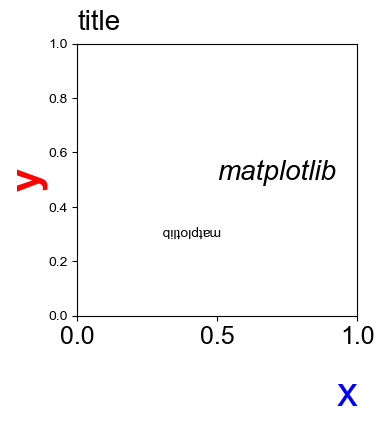

In [5]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,1,figsize=(4,4),dpi=100,facecolor="w")

#调整图的四周间距
fig.subplots_adjust(left=0.2,bottom=0.2)

# 单独设置轴刻度标签的字体
# axis {'x', 'y', 'both'}, default: 'both'
# which {'major', 'minor', 'both'}, default: 'major'
axes.tick_params(axis='x', labelsize=18)

xlabel_font = {
    #'fontsize': rcParams['axes.titlesize'], # 设置成和轴刻度标签一样的大小
    'fontsize': 30,
    #'fontweight': rcParams['axes.titleweight'], # 设置成和轴刻度标签一样的粗细
    'fontweight': 'light',
    #'color': rcParams['axes.titlecolor'], # 设置成和轴刻度标签一样的颜色
    'color': 'blue',
}
# fontdict 设置字体的相关属性
# labelpad 设置轴名称到轴的间距
# loc 设置x轴是靠那边对其
axes.set_xlabel('x', fontdict=xlabel_font,labelpad=20,loc='right')


ylabel_font = {
    #'fontsize': rcParams['axes.titlesize'], # 设置成和轴刻度标签一样的大小
    'fontsize': 30,
    #'fontweight': rcParams['axes.titleweight'], # 设置成和轴刻度标签一样的粗细
    'fontweight': 'bold',
    #'color': rcParams['axes.titlecolor'], # 设置成和轴刻度标签一样的颜色
    'color': 'red',
}
axes.set_ylabel('y',fontdict=ylabel_font,labelpad=0)

label_fontdict = {
    'fontsize': 20,
}
axes.set_title('title', fontdict=label_fontdict, loc='left', pad=10)
# 文字方向 rotation
plt.text(0.3, 0.3, 'matplotlib', rotation=180)

# 也可以单独修改,
font={
    'style': "italic",
    'weight': "normal",
    'fontsize':20
}
# 设置字体样式
plt.text(0.5, 0.5,'matplotlib', fontdict=font)  

